# Finance Data Project 

Analysis on stocks and how they progressed throughout the financial crisis. (https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In [2]:
from pandas_datareader import data, wb
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

## Data
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [ ]:
start = datetime(2006,1,1)
end = datetime(2016,1,1)
bac_data = data.DataReader("BAC",'yahoo',start,end)
c = data.DataReader("C",'yahoo',start,end)
gs = data.DataReader("GS",'yahoo',start,end)
jpm = data.DataReader("JPM",'yahoo',start,end)
ms= data.DataReader("MS",'yahoo',start,end)
wfc= data.DataReader("WFC",'yahoo',start,end)

In [3]:
tickers = ['BAC',"C","GS","JPM","MS","WFC"]

In [4]:
bank_stocks = pd.concat(objs = [bac_data,c,gs,jpm,ms,wfc],keys = tickers,axis = 1)

In [5]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [7]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.054218  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.681938  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.726604  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.674480  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.696808  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.399338  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.424999  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.527611  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.566090  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.963749  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.408512  
2006-01-04   31.799999  31.530001  10870000.0  20.171795  
2006-01-05   31.500000  31.495001  10158000.0  20.149401  
2006-01-06   31.580000  31.680000   8403800.0  20.267757  
2006-01-09   31.674999  31.674999   5619600.0  20.264565  

[5 rows x 36 columns]

# Exploratory Data Analysis


In [8]:
bank_stocks.xs(key = 'Close',axis = 1,level = 1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

A new empty dataFrame called returns is created. This dataframe will contain the returns for each bank's stock. returns are 
typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [9]:
for i in tickers:
    bank_stocks[i + "Returns"] = bank_stocks[i]['Close'].pct_change()
returns = pd.DataFrame(data =bank_stocks['BACReturns'],index = bank_stocks.index)
for i in tickers[1:]:
    returns[i + "Returns"] = bank_stocks[i+"Returns"]


In [10]:
returns.head(5)

,BACReturns,CReturns,GSReturns,JPMReturns,MSReturns,WFCReturns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


Returns dataframe

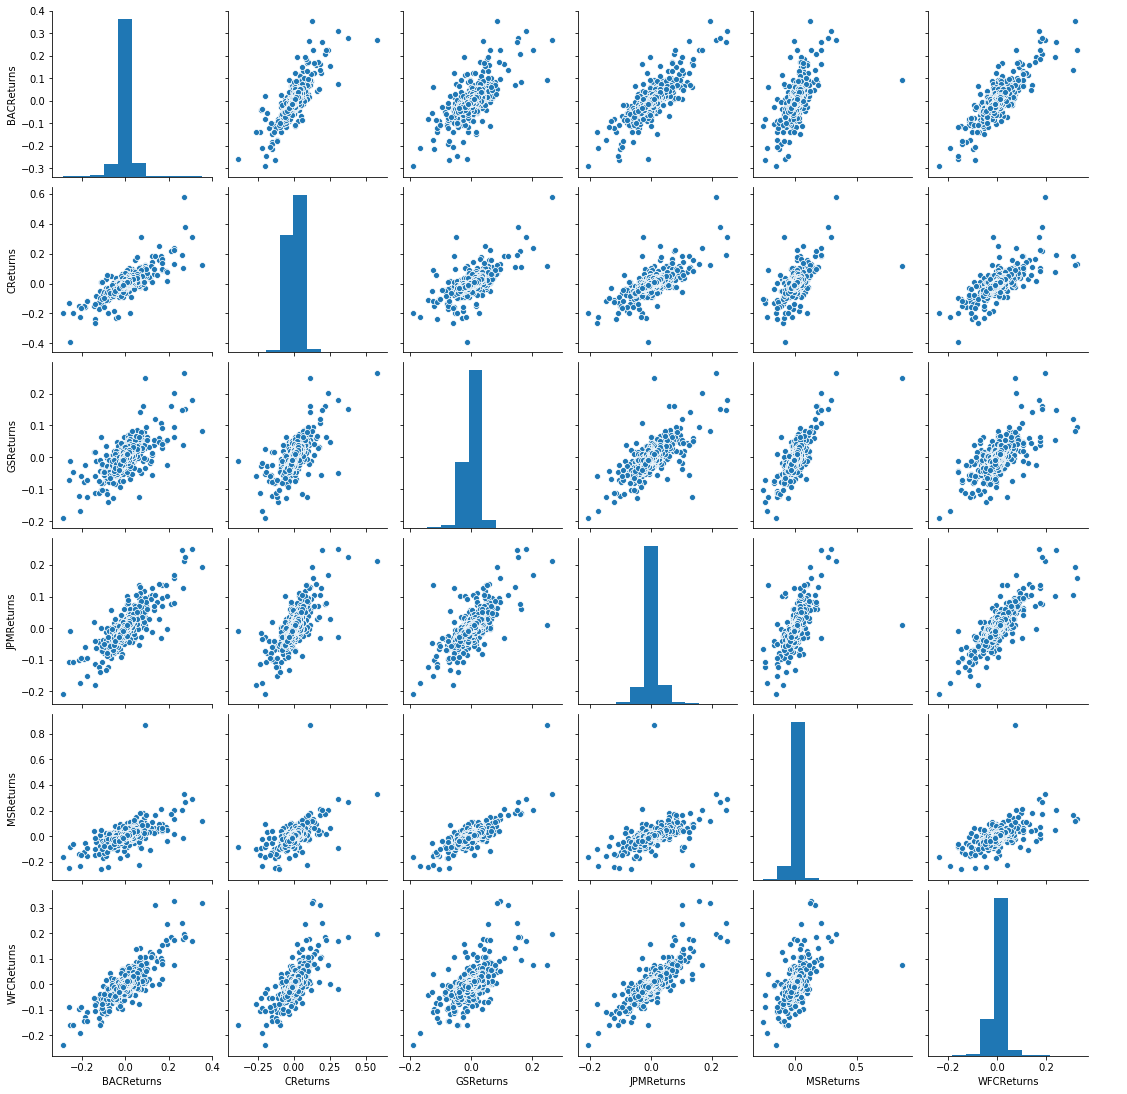

In [11]:
sns.pairplot(returns)

** Using this returns DataFrame,to figure out on what dates each bank stock had the best and worst single day returns.

In [151]:
returns.idxmax()

BACReturns   2009-04-09
CReturns     2008-11-24
GSReturns    2008-11-24
JPMReturns   2009-01-21
MSReturns    2008-10-13
WFCReturns   2008-07-16
dtype: datetime64[ns]

Citigroup's largest drop and biggest gain were very close to one another.

In [154]:
returns.std(axis=0)
#CRETURNS
returns.loc["2005-01-01":"2015-12-31"].std()
#MSReturn


BACReturns    0.036647
CReturns      0.038672
GSReturns     0.025390
JPMReturns    0.027667
MSReturns     0.037819
WFCReturns    0.030238
dtype: float64

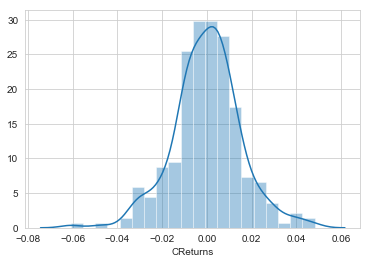

In [48]:
sns.distplot(returns["CReturns"].loc["2015-01-01":"2015-12-31"])

A distplot using seaborn of the 2015 returns for Morgan Stanley.

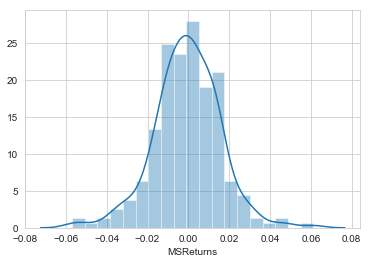

In [51]:
sns.distplot(returns["MSReturns"].loc["2015-01-01":"2015-12-31"])

Distplot using seaborn for the 2008 returns for CitiGroup.

In [54]:
returns.loc["2008-01-01":"2008-12-31"].std()


BACReturns    0.062934
CReturns      0.073523
GSReturns     0.050015
JPMReturns    0.053134
MSReturns     0.087604
WFCReturns    0.052439
dtype: float64

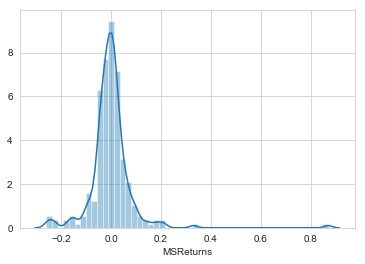

In [58]:
sns.distplot(returns["MSReturns"].loc["2008-01-01":"2008-12-31"])

____
# More Visualization


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

A line plot showing the Close price for each bank for the entire index of time. 

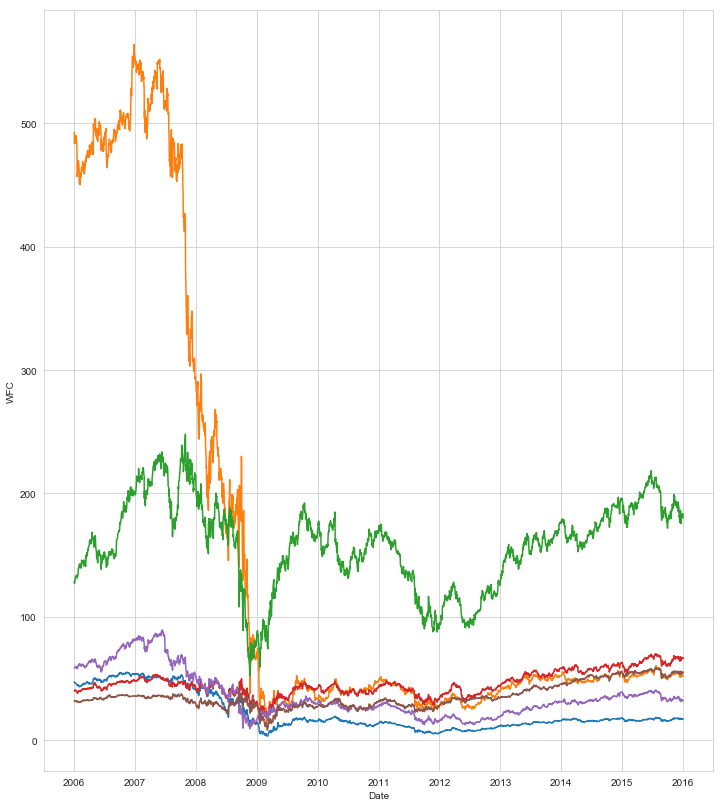

In [157]:
close_graph = bank_stocks.xs(key = 'Close',axis=1,level = 1)
plt.figure(figsize=(12,14))
for i in tickers:
    sns.lineplot(x = close_graph.index , y =close_graph[i], data = close_graph)

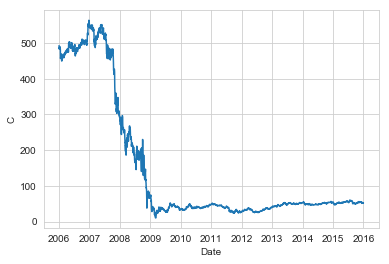

In [64]:
sns.lineplot(x = close_graph.index , y =close_graph["C"], data = close_graph)

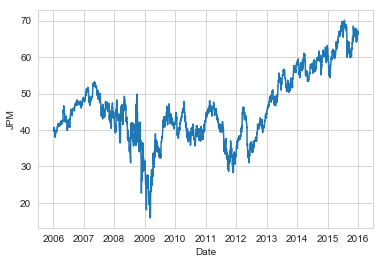

In [65]:
sns.lineplot(x = close_graph.index , y =close_graph["JPM"], data = close_graph)

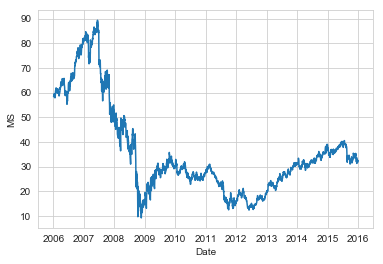

In [66]:
sns.lineplot(x = close_graph.index , y =close_graph["MS"], data = close_graph)

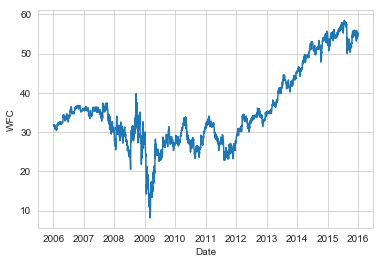

In [67]:
sns.lineplot(x = close_graph.index , y =close_graph["WFC"], data = close_graph)

## Moving Averages

analysing the moving averages for these stocks in the year 2008. 

The rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008.

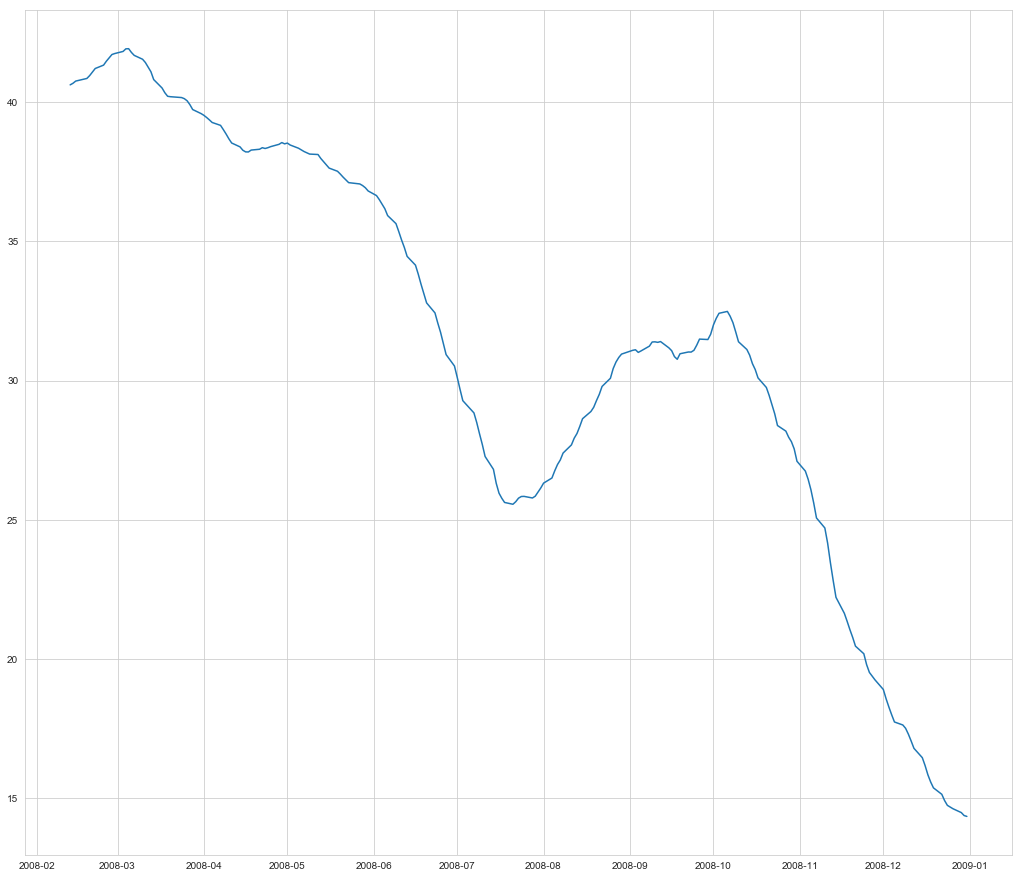

In [104]:
plt.figure(figsize=  (14,12))
rollavg = close_graph['BAC'].loc['2008-01-01':"2008-12-31"].rolling(30).mean()
sns.lineplot(data = rollavg)
plt.tight_layout(pad =0.00010)

In [111]:
corr_graph = close_graph.corr()

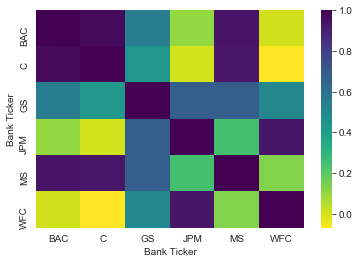

In [116]:
sns.heatmap(corr_graph,cmap = 'viridis_r')

A heatmap of the correlation between the stocks Close Price.**

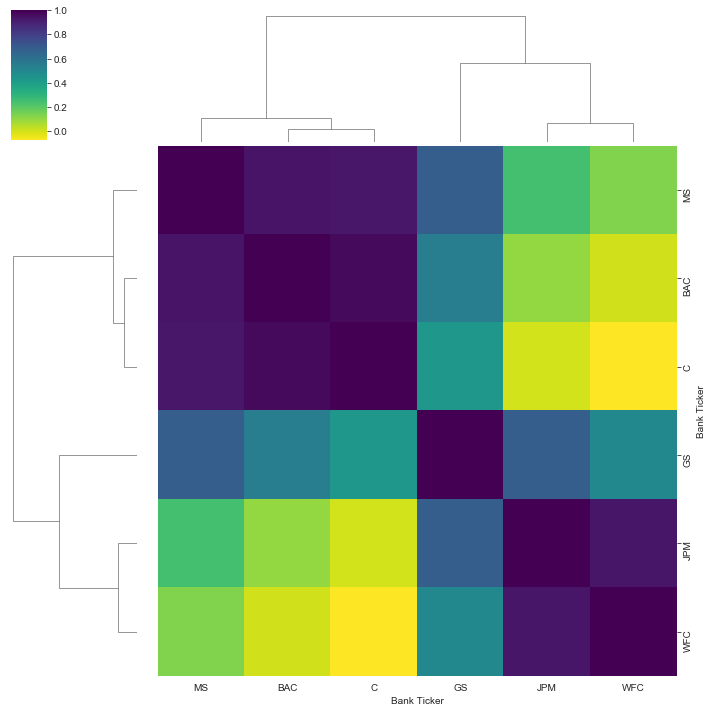

In [120]:
sns.clustermap(corr_graph,cmap = 'viridis_r')

In [140]:
bank_stocks.loc['2009-01-01':"2009-12-31"]['BAC'].iplot(kind = 'candle',x  =bank_stocks.index,y = 'Close')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [158]:
bank_stocks.loc['2015-01-01':"2015-12-31"]['MS'].ta_plot('sma',period = 30)

In [148]:
bank_stocks.loc['2015-01-01':"2015-12-31"]['BAC'].ta_plot('boll')